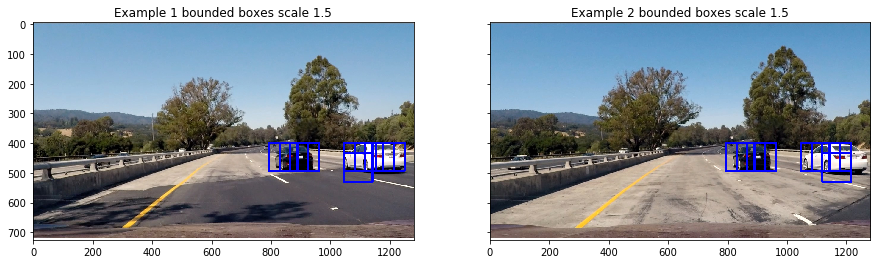

In [8]:
from useful_functions import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import pickle
%matplotlib inline  


ystart = 400
ystop = 656
scale = 1.5
spatial_size=(32, 32)
hist_bins = 32
  
#dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
dist_pickle = pickle.load( open("gridsearch_YCrCb_pickle.p", "rb" ) )
#dist_pickle = pickle.load( open("linear_HSV_pickle.p", "rb" ) )

svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]


img = mpimg.imread('./test_images/test1.jpg')

out_img, bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

img = mpimg.imread('./test_images/test4.jpg')

out_img2, bbox_list2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
ax1.imshow(out_img2)
ax1.set_title('Example 1 bounded boxes scale 1.5')
ax2.imshow(out_img)
ax2.set_title('Example 2 bounded boxes scale 1.5')
plt.savefig('./output_images/bboxes.jpg')

In [9]:
import numpy as np
from scipy.ndimage.measurements import label
import time

t = time.time()

img = mpimg.imread('./test_images/test1.jpg')

scale = 1.5
out_img, bbox_list1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

#scale = 2.0
#out_img, bbox_list2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


bbox_list = bbox_list1 #+ bbox_list2 #+ bbox_list3

heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,bbox_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

t2 = time.time()
print(round(t2-t, 2), 'Seconds to read image and draw predicted rectangles...')



2.27 Seconds to read image and draw predicted rectangles...


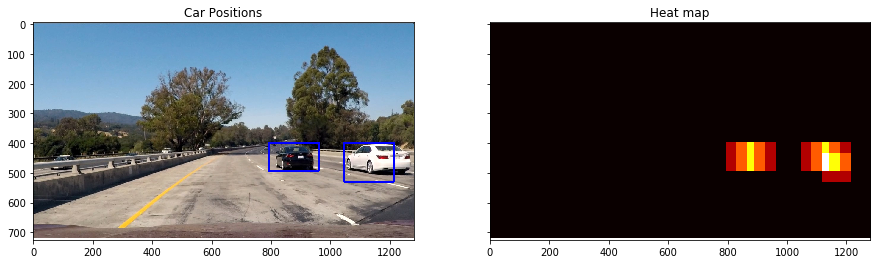

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
ax1.imshow(draw_img)
ax1.set_title('Car Positions')
ax2.imshow(heatmap, cmap='hot')
ax2.set_title('Heat map')
plt.savefig('./output_images/labeled_bboxes.jpg')

In [7]:
def process_image(img):
    
    scale = 1.5
    out_img, bbox_list1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    #scale = 2.0
    #out_img, bbox_list2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
  
    bbox_list = bbox_list1# + bbox_list2
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,bbox_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,0)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img

In [36]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [25]:
project_output = 'solution.mp4'
clip1 = VideoFileClip('test_video.mp4')
project_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output)

[MoviePy] >>>> Building video solution.mp4
[MoviePy] Writing audio in solutionTEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 2561.45it/s]

[MoviePy] Done.
[MoviePy] Writing video solution.mp4



 97%|█████████▋| 38/39 [00:07<00:00,  4.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: solution.mp4 

CPU times: user 11.4 s, sys: 56 ms, total: 11.4 s
Wall time: 8.6 s


In [37]:
project_output = 'project_solution.mp4'
clip5 = VideoFileClip('project_video.mp4')
project_clip = clip5.fl_image(process_image) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output)

[MoviePy] >>>> Building video project_solution.mp4
[MoviePy] Writing audio in project_solutionTEMP_MPY_wvf_snd.mp3


100%|██████████| 1112/1112 [00:00<00:00, 3687.48it/s]

[MoviePy] Done.
[MoviePy] Writing video project_solution.mp4



100%|█████████▉| 1260/1261 [1:03:40<00:03,  3.03s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_solution.mp4 

CPU times: user 1h 5min 42s, sys: 2.13 s, total: 1h 5min 44s
Wall time: 1h 3min 41s
